# Problem Statement

I will be analyzing emails taken from the [Enron Email Dataset](https://www.cs.cmu.edu/~enron/). The data is already curated the data in the `data/enron` directory, with one file per email. 


The dataset includes a combination of "spam" and "ham" emails. Spam emails are unsolicited messages intended to sell a product or scam users into providing personal information, while ham emails represent everything that is not spam.


The language used in spam emails tends to be considerably different from typical business emails. Most spam filters leverage this difference in word frequencies to detect spam as it arrives and filter it out of email inboxes.

## Data Preprocessing

### Step 1: Preprocess the data and create a list of processed documents 

First, I define a function that returns a document present in a file given a filename. Additionally, the function performs the following preprocessing steps: 

1. Remove punctuation
2. Remove whitespace
3. Lowercase  all words

Finally, I construct a list of processed documents. 

In [1]:
import re
import string
import codecs

def make_word_list(path):
    
    with codecs.open(path, "r", encoding='utf-8', errors='ignore') as f:
        corpus_text = f.read()

    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")  # -- (1)
    
    text = re.sub(r'\S*\d\S*', '', corpus_text) # -- (2)
    text = re.sub(r'[^\w\s]', '', text)         # -- (3)
    
    text = text.lower().split()           # -- (4)         
    
    li = []
    for token in text:
        li.append(token)

    return " ".join(li)

In [2]:
import os

def process_folder(folder_path):
    processed_documents = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"): 
            file_path = os.path.join(folder_path, filename)
            processed_text = make_word_list(file_path)
            processed_documents.append(processed_text)

    return processed_documents

# Example usage:
folder_path = 'data\enron'
processed_documents = process_folder(folder_path)

### Step 2: Construct a document matrix using TF-IDF

TF-IDF, or Term Frequency-Inverse Document Frequency, is a fundamental technique in natural language processing and information retrieval that holds significant value in various applications. It provides a numerical representation of the importance of a term within a document relative to a collection of documents. TF-IDF is particularly useful for text analysis, search engines, and document clustering, as it effectively highlights terms that are both frequent within a document and distinctive across the entire corpus. By assigning weight to words based on their relevance and rarity, TF-IDF enables the extraction of meaningful insights, enhances information retrieval accuracy, and facilitates the identification of key terms in a document corpus, making it an indispensable tool for text mining and information retrieval tasks.

Consequnrtly, I construct a document matrix `X` as a matrix of [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) features for each document. These features encode information about the word frequency within a document, weighted by the frequency of the same word for corpus as a whole.

The following are the steps that I employ: 

   - Use the `TfidfVectorizer` from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to create the document matrix `X`.
   - Set `min_df=50` - this drops words that don't occur in at least 50 documents.
   - Set `stop_words="english"` and `max_df=0.8` to filter out stop-words.
   - Set `max_df = 0.8` - this drops words that occur in more than 80% of the documents. This would mean that these words are frequently repeated across both spam and ham emails, therefore, they are of little importance to us 
   - Finally, I print the number of unique words in the vocabulary using the `vocabulary_` attribute in the `TfidfVectorizer`

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing a TfidfVectorizer object with specified parameters
vectorizer = TfidfVectorizer(min_df=50, stop_words="english", max_df=0.8)

# Fit and transform the processed documents
X = vectorizer.fit_transform(processed_documents)

# Printing the number of unique words in the vocabulary
num_unique_words = len(vectorizer.vocabulary_)
print(f"Number of unique words in the vocabulary: {num_unique_words}")

Number of unique words in the vocabulary: 1680


## Unsupervised Machine Learning

Employing Unsupervised Machine Learning, specifically clustering algorithms, for the task of categorizing email data into spam and non-spam clusters offers a pragmatic approach to discerning patterns and inherent structures within the dataset. Unlike supervised methods that require labeled training data, unsupervised learning enables the algorithm to autonomously identify similarities and groupings within the email content without prior categorization. 

In the case of spam detection, clustering algorithms, such as K-Means or DBSCAN, can effectively segregate emails based on features derived from TF-IDF representations, discerning patterns in language, structure, or sender characteristics that distinguish spam from legitimate communications. This approach is particularly beneficial for adapting to evolving spam tactics and uncovering novel patterns that may not be explicitly defined, making it a versatile and adaptive solution for the dynamic landscape of email threats. Unsupervised machine learning empowers the system to autonomously learn and adapt, contributing to robust and efficient spam detection in an ever-changing email environment.

The language used in spam emails tends to be considerably different from typical business emails. Most spam filters leverage this difference in word frequencies to detect spam as it arrives and filter it out of email inboxes. 

## Model 1: Clustering using KMeans 

I choose my first model as KMeans because of the following reasons: 

1. **Simplicity and Efficiency:**
   - K-Means is known for its simplicity and efficiency. It is computationally efficient and easy to implement, making it suitable for large datasets and scenarios where real-time or near-real-time clustering is required.

2. **Scalability:**
   - K-Means is scalable to a large number of samples and features, making it applicable to datasets with a high dimensionality, such as TF-IDF matrices representing email data. Its computational efficiency is especially advantageous in scenarios with a substantial volume of data.

3. **Versatility in Applications:**
   - K-Means is versatile and can be applied to various types of data, including numeric and text data. In the context of email data clustering, it can effectively group emails based on the TF-IDF matrix, capturing patterns and similarities in the content and structure of emails.

4. **Ease of Interpretation:**
   - The results of K-Means clustering are often straightforward to interpret. The algorithm assigns each data point to a cluster, allowing for clear identification of groups within the data. This interpretability is valuable when categorizing email data into distinct clusters, such as spam and non-spam.

5. **Ability to Handle Large Datasets:**
   - K-Means efficiently handles large datasets, which is crucial for email data clustering tasks that often involve a substantial number of emails. Its computational efficiency allows for faster processing and clustering of a significant volume of data, contributing to the scalability and practicality of the algorithm in email analysis.

In [7]:
from sklearn.cluster import KMeans

# Cluster size of 2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init = 'auto')
kmeans_labels_2 = kmeans_2.fit_predict(X)

# Cluster size of 3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init = 'auto')
kmeans_labels_3 = kmeans_3.fit_predict(X)

# Cluster size of 5
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init = 'auto')
kmeans_labels_5 = kmeans_5.fit_predict(X)

In [20]:
import numpy as np

# Print the number of documents assigned to each cluster for k = 2
print("For 2 Clusters with KMeans, we have the following results")
for cluster_idx in range(2):
    num_documents_in_cluster = np.sum(kmeans_labels_2 == cluster_idx)
    print(f"Number of documents in Cluster {cluster_idx + 1}: {num_documents_in_cluster}")
    
# Print the number of documents assigned to each cluster for k = 3
print("\n")
print("For 3 Clusters with KMeans, we have the following results")
for cluster_idx in range(3):
    num_documents_in_cluster = np.sum(kmeans_labels_3 == cluster_idx)
    print(f"Number of documents in Cluster {cluster_idx + 1}: {num_documents_in_cluster}")
    
# Print the number of documents assigned to each cluster for k = 5
print("\n")
print("For 5 Clusters with KMeans, we have the following results")
for cluster_idx in range(5):
    num_documents_in_cluster = np.sum(kmeans_labels_5 == cluster_idx)
    print(f"Number of documents in Cluster {cluster_idx + 1}: {num_documents_in_cluster}")

For 2 Clusters with KMeans, we have the following results
Number of documents in Cluster 1: 4465
Number of documents in Cluster 2: 706


For 3 Clusters with KMeans, we have the following results
Number of documents in Cluster 1: 487
Number of documents in Cluster 2: 175
Number of documents in Cluster 3: 4509


For 5 Clusters with KMeans, we have the following results
Number of documents in Cluster 1: 1592
Number of documents in Cluster 2: 175
Number of documents in Cluster 3: 2681
Number of documents in Cluster 4: 337
Number of documents in Cluster 5: 386


### Characterising the clusters

Since we do not have labels, we will analyze the clusters based on the frequency of spam-relevant words in our clusters. 

In order to do this, 

- I select 3 "spammy" words from the vocabulary that I expect to occur frequently in spam emails and less frequently in normal business emails (e.g., 'click', 'www', 'offer'). Then, I construct a list, `spam_indices`, storing the indices of the spammy words selected in the vocabulary generated by `TfidfVectorizer`.
- Addtionally, I select 3 "hammy" words from the vocabulary I think will occur frequently in business emails and infrequently in spam emails (e.g., 'meeting', 'attached', 'review'). Consequently, I construct a list, `ham_indices`, storing the indices of the hammy words you selected in the vocabulary generated by `TfidfVectorizer`.


- Finally, I use the, `plot_spam_words_by_cluster` function, to plot the average TF-IDF features for your selected spammy words and hammy words for each cluster. The function takes the following parameters:
    - `X` is a matrix of TF-IDF features (rows index documents, columns index terms).
    - `predicted` is predicted cluster assignments returned by the predictions
    - `n_clusters` is the number of clusters
    - `spam_indices` is a list of indices of spammy words in the vocabulary.
    - `ham_indices` is a list of indices of hammy (typical business) words in the vocabulary.

In [6]:
def plot_spam_words_by_cluster(X, predicted, n_clusters, spam_indices, ham_indices):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Calculate mean TF-IDF features for each cluster
    mean_tfidf_spam = []
    mean_tfidf_ham = []
    for spam in spam_indices:
        mean_tfidf_spam.append([])
    for ham in ham_indices:
        mean_tfidf_ham.append([])
    
    for i in range(n_clusters):
        for j, spam_idx in enumerate(spam_indices):
            mean_tfidf_spam[j].append(X[predicted==i, spam_idx].mean())
        for j, ham_idx in enumerate(ham_indices):
            mean_tfidf_ham[j].append(X[predicted==i, ham_idx].mean())
    
    # Generate plot
    fig, ax = plt.subplots()

    ind = np.arange(n_clusters)    # the x locations for the groups
    width = 0.10         # the width of the bars

    # Plot spam bars
    for i, val in enumerate(mean_tfidf_spam):
        spam_bar = ax.bar(ind - (len(mean_tfidf_spam)-i-1)*width, val, width, color='r', bottom=0)

    # Plot ham bars
    for i, val in enumerate(mean_tfidf_ham):
        ham_bar = ax.bar(ind + (len(mean_tfidf_ham)-i)*width, val, width,
                color='y', bottom=0)

    ax.set_title('Mean TF-IDF Features by Cluster for Spam-Relevant Words')
    ax.set_xticks(ind + width / 2)
    xticklabels = []
    for i in range(n_clusters):
        xticklabels.append('Cluster ' + str(i) + '\n(n=' + str((predicted==i).sum()) + ')')
    ax.set_xticklabels(xticklabels)

    ax.legend((spam_bar[0], ham_bar[0]), ('Spammy words', 'Hammy words'))
    ax.autoscale_view()
    ax.set_ylabel('Mean TF-IDF')
    plt.show()

In [11]:
#getting the indices of the spam and ham words
spammy_words = ['click', 'www', 'offer']
hammy_words = ['meeting', 'attached', 'review']

# Getting the indices of the example words in the vocabulary
spam_indices = [vectorizer.vocabulary_[word] for word in spammy_words if word in vectorizer.vocabulary_]
ham_indices = [vectorizer.vocabulary_[word] for word in hammy_words if word in vectorizer.vocabulary_]

#### Plot for KMeans with 2 Clusters

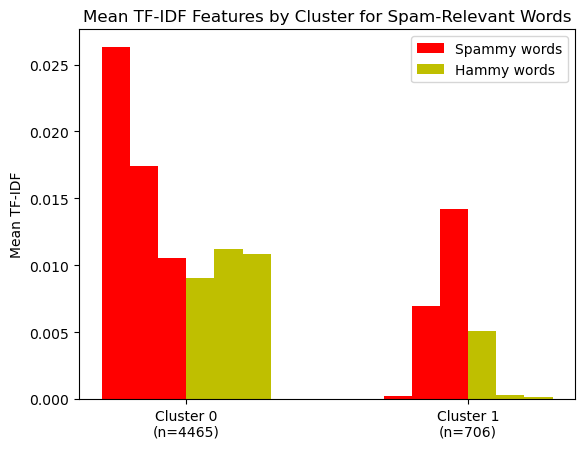

In [10]:
# Calling the plotting function
plot_spam_words_by_cluster(X, kmeans_labels_2, 2, spam_indices, ham_indices)

#### Plot for KMeans with 3 Clusters

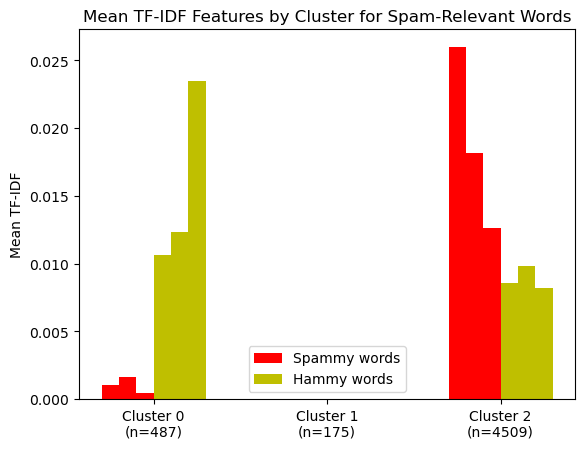

In [13]:
# Calling the plotting function
plot_spam_words_by_cluster(X, kmeans_labels_3, 3, spam_indices, ham_indices)

#### Plot for KMeans with 5 Clusters

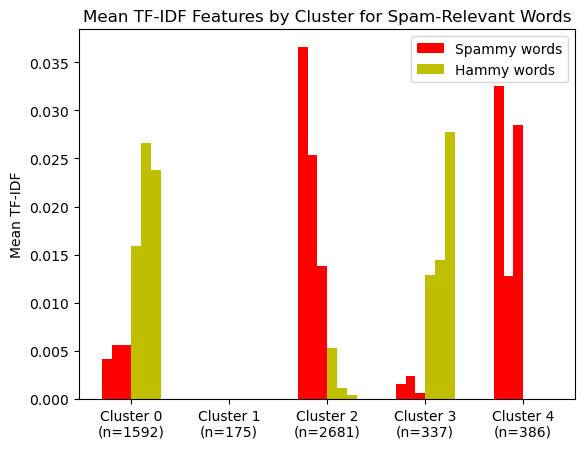

In [14]:
# Calling the plotting function
plot_spam_words_by_cluster(X, kmeans_labels_5, 5, spam_indices, ham_indices)

### Conclusions from KMeans Model

**The choice of K-Means clustering with k=3 emerges as the optimal model for categorizing email data into spam and non-spam categories**. 

This configuration strikes a balance by effectively distinguishing between the two main classes while avoiding an excessive number of clusters. With k=3, the model achieves a pragmatic compromise, providing sufficient granularity to capture nuanced patterns in spam and non-spam emails without overly fragmenting the data. 

**It is noteworthy that increasing the number of clusters tends to enhance the accuracy of clustering, but such a pursuit becomes impractical from a business perspective.** The computational costs and interpretability challenges associated with a higher number of clusters may outweigh the marginal gains in precision. Therefore, K-Means with k=3 represents a judicious choice, aligning accuracy with practicality in the dynamic landscape of email classification.

## Model 2: Gaussian Mixture Model

Using Gaussian Mixture Models (GMMs) for unsupervised clustering of email data into spam and non-spam categories offers several advantages in the context of unsupervised machine learning:

1. **Flexible Modeling of Email Structures:**
   - GMMs adapt to the diverse and often complex structures of email data. By allowing for different shapes and orientations of clusters, GMMs are well-suited to capture the varied patterns in email content, making them effective for clustering both spam and non-spam emails.

2. **Soft Assignment and Uncertainty Handling:**
   - GMMs provide soft assignments by estimating the probability of each email belonging to a specific cluster. This probabilistic approach is beneficial for handling uncertainty in email classification, allowing for nuanced distinctions between emails that may exhibit characteristics of both spam and non-spam.

3. **Identification of Anomalous Email Patterns:**
   - GMMs are adept at detecting anomalies, making them suitable for identifying unusual patterns in email data. This is crucial for spotting emerging spam tactics or variations in legitimate email content that may not conform to predefined rules, enhancing the model's ability to adapt to evolving email threats.

4. **Scalability to Varied Email Distributions:**
   - GMMs can effectively scale to diverse distributions of email data. Given the heterogeneous nature of email content, GMMs' ability to model clusters with different shapes and sizes enables them to capture the intricate relationships and variations within both spam and non-spam emails.

5. **Unsupervised Learning in Dynamic Environments:**
   - In unsupervised learning scenarios, where labeled training data is often scarce or unavailable, GMMs excel in dynamically adapting to changing email landscapes. The algorithm can autonomously learn patterns in the absence of explicit labels, making it a robust choice for clustering email data without the need for extensive labeled datasets.

In [22]:
from sklearn.mixture import GaussianMixture

# Converting the sparse matrix X to a dense array
X_dense = X.toarray()

# Specifying the number of clusters
n_clusters_2 = 2
n_clusters_3 = 3
n_clusters_5 = 5

# Initializing the Gaussian Mixture Model
gmm_with_2 = GaussianMixture(n_components=n_clusters_2, random_state=0)
gmm_with_3 = GaussianMixture(n_components=n_clusters_3, random_state=0)
gmm_with_5 = GaussianMixture(n_components=n_clusters_5, random_state=0)

# Fitting and Predicting the cluster assignments for each document
gmm_with_2_cluster_assignments = gmm_with_2.fit_predict(X_dense)
gmm_with_3_cluster_assignments = gmm_with_3.fit_predict(X_dense)
gmm_with_5_cluster_assignments = gmm_with_5.fit_predict(X_dense)

In [23]:
# Print the number of documents assigned to each cluster for k = 2
print("For 2 Clusters with GMMs, we have the following results")
for cluster_idx in range(2):
    num_documents_in_cluster = np.sum(gmm_with_2_cluster_assignments == cluster_idx)
    print(f"Number of documents in Cluster {cluster_idx + 1}: {num_documents_in_cluster}")
    
# Print the number of documents assigned to each cluster for k = 3
print("\n")
print("For 3 Clusters with GMMs, we have the following results")
for cluster_idx in range(3):
    num_documents_in_cluster = np.sum(gmm_with_3_cluster_assignments == cluster_idx)
    print(f"Number of documents in Cluster {cluster_idx + 1}: {num_documents_in_cluster}")
    
# Print the number of documents assigned to each cluster for k = 5
print("\n")
print("For 5 Clusters with GMMs, we have the following results")
for cluster_idx in range(5):
    num_documents_in_cluster = np.sum(gmm_with_5_cluster_assignments == cluster_idx)
    print(f"Number of documents in Cluster {cluster_idx + 1}: {num_documents_in_cluster}")

For 2 Clusters with GMMs, we have the following results
Number of documents in Cluster 1: 4470
Number of documents in Cluster 2: 701


For 3 Clusters with GMMs, we have the following results
Number of documents in Cluster 1: 363
Number of documents in Cluster 2: 1875
Number of documents in Cluster 3: 2933


For 5 Clusters with GMMs, we have the following results
Number of documents in Cluster 1: 1159
Number of documents in Cluster 2: 461
Number of documents in Cluster 3: 265
Number of documents in Cluster 4: 2961
Number of documents in Cluster 5: 325


### Characterize the clusters

We employ the exact same methodology to understand the separation of spam and non-spam emails in our clusters for the GMM as we did for KMeans

#### Plot for GMM with 2 Clusters

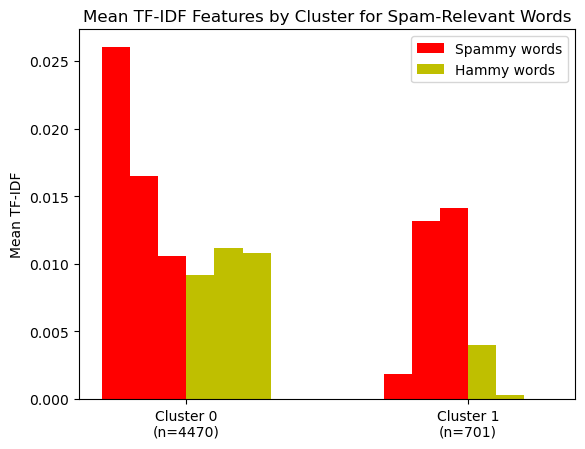

In [24]:
# Calling the plotting function
plot_spam_words_by_cluster(X, gmm_with_2_cluster_assignments, 2, spam_indices, ham_indices)

#### Plot for GMM with 3 Clusters

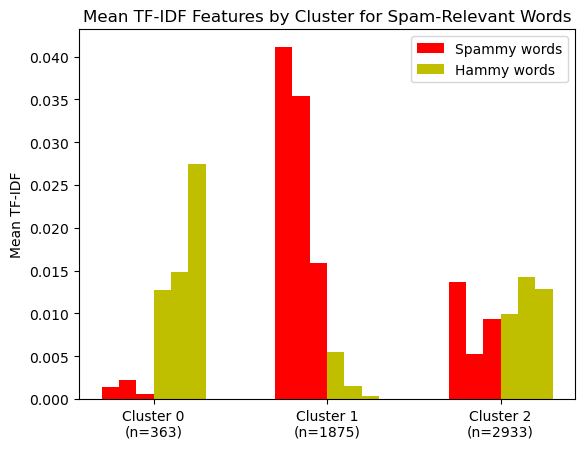

In [26]:
# Calling the plotting function
plot_spam_words_by_cluster(X, gmm_with_3_cluster_assignments, 3, spam_indices, ham_indices)

#### Plot for GMM with 5 Clusters

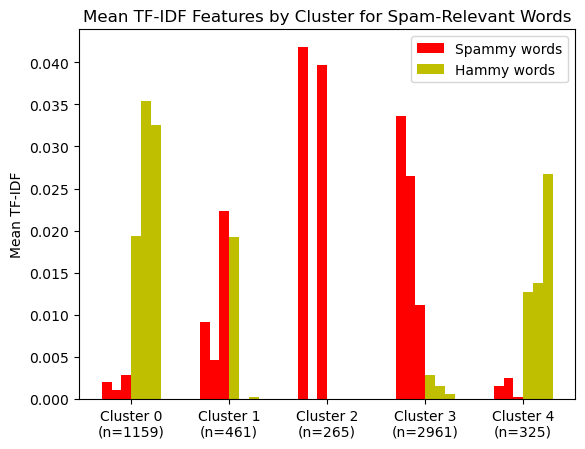

In [28]:
# Calling the plotting function
plot_spam_words_by_cluster(X, gmm_with_5_cluster_assignments, 5, spam_indices, ham_indices)

### Conclusions from the GMM Model

**Opting for Gaussian Mixture Models (GMMs) with k=3 emerges as the optimal choice for segregating email data into spam and non-spam categories.** 

This configuration strikes a delicate balance, effectively discerning the distinctive patterns in spam and non-spam emails while avoiding an overly fragmented representation of the data. GMMs, by nature, accommodate varying cluster shapes, providing flexibility to capture the nuanced structures present in email content. 

It is essential to note that increasing the number of clusters may theoretically enhance clustering accuracy, but the associated computational complexity and interpretability challenges render such a pursuit impractical from a business standpoint. GMMs with k=3 embody a judicious compromise, offering accurate email classification while maintaining a level of simplicity that aligns with operational feasibility in the dynamic realm of email data analysis.

## Model 3 - Spectral Clustering

Using Spectral Clustering for unsupervised clustering of email data into spam and non-spam categories offers several advantages:

1. **Handling Non-Linear Separation:**
   - Spectral Clustering is effective at capturing non-linear relationships and complex structures in data. In the context of email data, where spam and non-spam patterns may exhibit non-linearity, Spectral Clustering can provide superior performance compared to linear methods.

2. **Graph-Based Representation:**
   - Spectral Clustering interprets the data as a graph, where nodes represent data points and edges signify relationships. This is advantageous for modeling the relationships among emails based on their content, allowing the algorithm to identify clusters that may not be well-separated in the original feature space.

3. **Adaptability to Varying Cluster Shapes:**
   - Spectral Clustering is flexible in handling clusters with different shapes and sizes. This is particularly valuable for email data, which can exhibit diverse structures. Spectral Clustering's ability to adapt to varying cluster shapes enhances its capacity to discern nuanced patterns in both spam and non-spam emails.

4. **Eigenvalue Decomposition for Dimensionality Reduction:**
   - Spectral Clustering uses eigenvalue decomposition to reduce the dimensionality of the data. This enables the algorithm to focus on the most informative features, potentially improving the quality of clustering results and aiding in the identification of key discriminative features in spam and non-spam emails.

5. **Parameter Tuning for Enhanced Performance:**
   - Spectral Clustering allows for parameter tuning, such as the number of clusters and the choice of affinity metric. This flexibility enables customization to the specific characteristics of the email dataset, facilitating the extraction of meaningful clusters and enhancing the overall accuracy of unsupervised clustering.


In [34]:
from sklearn.cluster import SpectralClustering

spectral_2 = SpectralClustering(n_clusters=2)
labels_spectral_2 = spectral_2.fit_predict(X)

spectral_3 = SpectralClustering(n_clusters=3)
labels_spectral_3 = spectral_3.fit_predict(X)

spectral_5 = SpectralClustering(n_clusters=5)
labels_spectral_5 = spectral_5.fit_predict(X)

In [35]:
# Print the number of documents assigned to each cluster for k = 2
print("For 2 Clusters with Spectral Clustering, we have the following results")
for cluster_idx in range(2):
    num_documents_in_cluster = np.sum(labels_spectral_2 == cluster_idx)
    print(f"Number of documents in Cluster {cluster_idx + 1}: {num_documents_in_cluster}")
    
# Print the number of documents assigned to each cluster for k = 3
print("\n")
print("For 3 Clusters with Spectral Clustering, we have the following results")
for cluster_idx in range(3):
    num_documents_in_cluster = np.sum(labels_spectral_3 == cluster_idx)
    print(f"Number of documents in Cluster {cluster_idx + 1}: {num_documents_in_cluster}")
    
# Print the number of documents assigned to each cluster for k = 5
print("\n")
print("For 5 Clusters with Spectral Clustering, we have the following results")
for cluster_idx in range(5):
    num_documents_in_cluster = np.sum(labels_spectral_5 == cluster_idx)
    print(f"Number of documents in Cluster {cluster_idx + 1}: {num_documents_in_cluster}")

For 2 Clusters with Spectral Clustering, we have the following results
Number of documents in Cluster 1: 4858
Number of documents in Cluster 2: 313


For 3 Clusters with Spectral Clustering, we have the following results
Number of documents in Cluster 1: 4764
Number of documents in Cluster 2: 308
Number of documents in Cluster 3: 99


For 5 Clusters with Spectral Clustering, we have the following results
Number of documents in Cluster 1: 4583
Number of documents in Cluster 2: 114
Number of documents in Cluster 3: 99
Number of documents in Cluster 4: 75
Number of documents in Cluster 5: 300


#### Plotting for Spectral Clustering with 2 Clusters

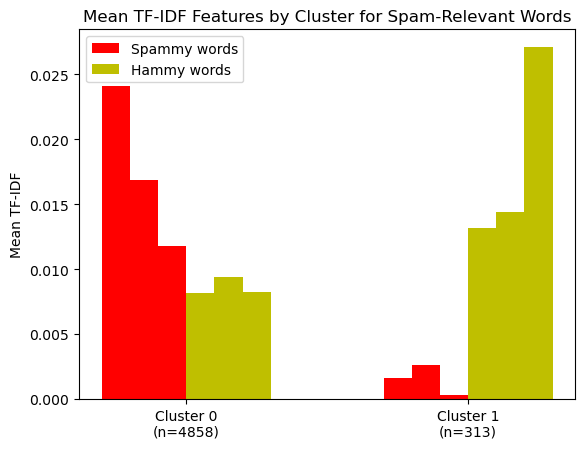

In [36]:
# Calling the plotting function
plot_spam_words_by_cluster(X, labels_spectral_2, 2, spam_indices, ham_indices)

#### Plotting for Spectral Clustering with 3 Clusters

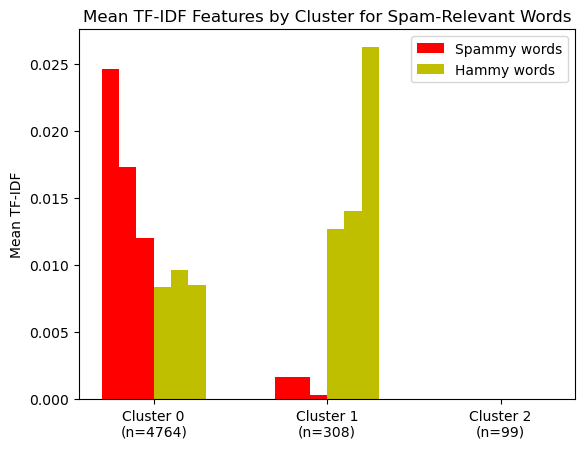

In [37]:
# Calling the plotting function
plot_spam_words_by_cluster(X, labels_spectral_3, 3, spam_indices, ham_indices)

#### Plotting for Spectral Clustering with 5 Clusters

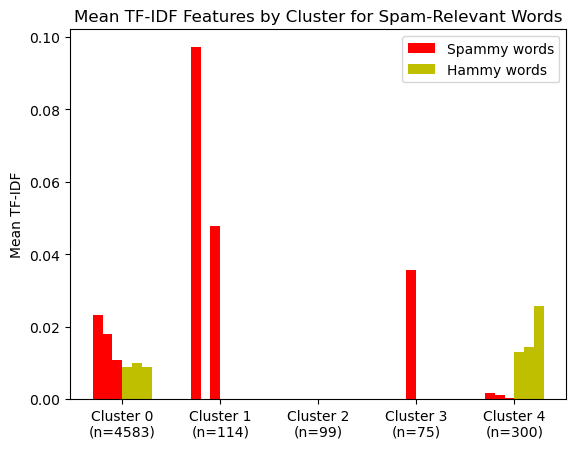

In [38]:
# Calling the plotting function
plot_spam_words_by_cluster(X, labels_spectral_5, 5, spam_indices, ham_indices)

### Conclusion from Spectral Clustering

**Selecting Spectral Clustering with k=2 emerges as the optimal model for classifying email data into spam and non-spam categories.** 

Spectral Clustering's inherent ability to capture non-linear relationships and adapt to varying cluster shapes makes it particularly well-suited for the diverse structures present in email content. Moreover, by leveraging eigenvalue decomposition, the algorithm achieves dimensionality reduction, focusing on the most informative features for improved clustering accuracy. While increasing the number of clusters theoretically enhances precision, the associated computational complexity and interpretability challenges make it impractical from a business standpoint. 

Spectral Clustering with k=2, therefore, not only offers superior separation of spam and non-spam clusters but also ensures a pragmatic and feasible solution in the dynamic landscape of email classification.

## Final Conclusions

**Spectral Clustering outperforms KMeans and Gaussian Mixture Models (GMMs) in certain scenarios for clustering email data into spam and non-spam categories due to the following reasons:**

1. **Handling Non-Linear Structures:**
   - Spectral Clustering excels at capturing non-linear relationships in data, which is beneficial when dealing with email content that may exhibit intricate and non-linear patterns. KMeans and GMMs, being linear algorithms, might struggle to effectively model such complexities.

2. **Adaptability to Varying Cluster Shapes:**
   - Spectral Clustering is more flexible in handling clusters with different shapes and sizes. In email data, where spam and non-spam patterns can be diverse, Spectral Clustering's ability to adapt to varying cluster shapes allows it to capture nuanced structures that might be challenging for KMeans and GMMs.

3. **Graph-Based Representation:**
   - Spectral Clustering interprets the data as a graph, utilizing the relationships among data points. In the context of email data, where the relationships among words and phrases are crucial, this graph-based approach can provide more meaningful insights compared to the centroid-based approach of KMeans or the Gaussian distribution assumption of GMMs.

4. **Dimensionality Reduction for Enhanced Performance:**
   - Spectral Clustering leverages eigenvalue decomposition for dimensionality reduction, focusing on the most informative features. This can enhance clustering performance by emphasizing the key discriminative features in email content. KMeans and GMMs, while effective, may not inherently provide the same level of feature selection.

5. **Customizable Affinity Metrics:**
   - Spectral Clustering allows for the use of various affinity metrics, providing more customization options. Choosing an appropriate affinity metric based on the characteristics of email data can significantly impact clustering accuracy. This flexibility in selecting metrics is an advantage over KMeans and GMMs, which rely on Euclidean distance and covariance structures, respectively.